Instructions:
1. Choose a unique dataset from: https://archive.ics.uci.edu
2. Your dataset should be unique from your classmates otherwise no points will be given for this exercise.
### Complete the Tasks in bold

## Data Exploration

**TASK: Create a correlation heatmap.**

In [9]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
fertility = fetch_ucirepo(id=244) 
  
# data (as pandas dataframes) 
X = fertility.data.features 
y = fertility.data.targets 
  
# metadata 
print(fertility.metadata) 
  
# variable information 
print(fertility.variables) 


{'uci_id': 244, 'name': 'Fertility', 'repository_url': 'https://archive.ics.uci.edu/dataset/244/fertility', 'data_url': 'https://archive.ics.uci.edu/static/public/244/data.csv', 'abstract': '100 volunteers provide a semen sample analyzed according to the WHO 2010 criteria. Sperm concentration are related to socio-demographic data, environmental factors, health status, and life habits', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 100, 'num_features': 9, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['diagnosis'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C5Z01Z', 'creators': ['David Gil', 'Jose Girela'], 'intro_paper': {'title': 'Predicting seminal quality with artificial intelligence methods', 'authors': 'David Gil, J. L. Girela, Joaquin De Juan, M. Jose G

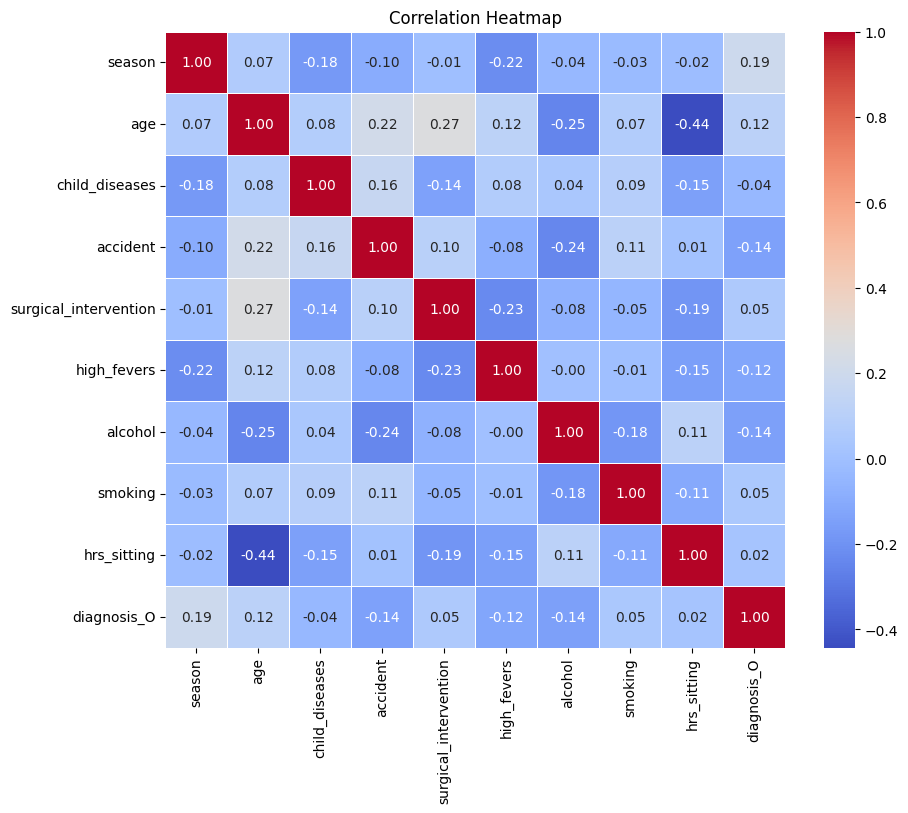

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "https://archive.ics.uci.edu/static/public/244/data.csv"
data = pd.read_csv(url)

# Check if the columns exist before dropping them
columns_to_drop = ['name', 'demographic', 'description', 'units', 'missing_values']
existing_columns = [col for col in columns_to_drop if col in data.columns]

# Drop existing columns
if existing_columns:
    numeric_data = data.drop(columns=existing_columns)
else:
    numeric_data = data.copy()

# Convert categorical columns to dummy variables
categorical_columns = numeric_data.select_dtypes(include=['object']).columns
numeric_data = pd.get_dummies(numeric_data, columns=categorical_columns, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [15]:
data

,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting,diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

In [16]:
# Map the label to 0s and 1s
data['diagnosis'] = data['diagnosis'].map({'N': 0, 'O': 1})

In [21]:
# Calculate the correlation between each feature and the label
correlation_with_label = data.corr()['diagnosis']

# Take the absolute values of correlations
absolute_correlation = correlation_with_label.abs()

# Sort the absolute correlations in descending order
sorted_correlation = absolute_correlation.sort_values(ascending=False)

# Select the top 5 correlated frequencies
top_correlated_frequencies = sorted_correlation[1:6]  # Exclude the label itself

print("Top 5 correlated frequencies with the target label:")
print(top_correlated_frequencies)

Top 5 correlated frequencies with the target label:
season         0.192417
alcohol        0.144760
accident       0.141346
high_fevers    0.121421
age            0.115229
Name: diagnosis, dtype: float64


## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: Do not forget to put a random_state for reproducibility.*


In [26]:
from sklearn.model_selection import train_test_split

# Split the data into features and labels
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Split the data into training set (90%) and test set (10%)
X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_cv, y_train_cv, test_size=0.1, random_state=42)

# Print the shapes of the resulting sets
print("Training set (Cross-Validation):", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set (Cross-Validation): (81, 9) (81,)
Validation set: (9, 9) (9,)
Test set: (10, 9) (10,)


**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [29]:
# Create a pipeline with StandardScaler and KNeighborsClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: StandardScaler for feature scaling
    ('knn', KNeighborsClassifier())  # Step 2: KNeighborsClassifier model
])

# Print the pipeline
print(pipeline)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])


**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [37]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for k
param_grid = {'knn__n_neighbors': [3, 5, 7, 9, 11]}  # Test various values of k

# Create GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_cv, y_train_cv)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get mean test scores and corresponding values of k
mean_test_scores = grid_search.cv_results_['mean_test_score']
k_values = param_grid['knn__n_neighbors']

# Get the best accuracy and corresponding value of k
best_accuracy = grid_search.best_score_
best_k = grid_search.best_params_['knn__n_neighbors']
# Print the best accuracy
print("Best Accuracy:", best_accuracy)


Best Parameters: {'knn__n_neighbors': 3}
Best Accuracy: 0.8888888888888887


**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

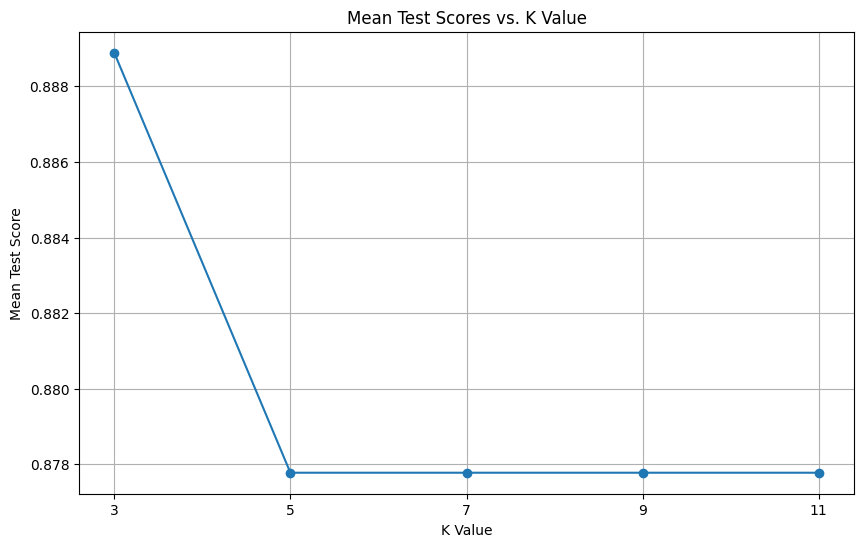

In [34]:
import matplotlib.pyplot as plt

# Get mean test scores and corresponding values of k
mean_test_scores = grid_search.cv_results_['mean_test_score']
k_values = param_grid['knn__n_neighbors']

# Plot mean test scores vs. k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o', linestyle='-')
plt.title('Mean Test Scores vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Test Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions on the test set
y_pred = grid_search.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10


Confusion Matrix:
[[9 0]
 [1 0]]


C:\Users\Lara Jakosalem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lara Jakosalem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lara Jakosalem\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

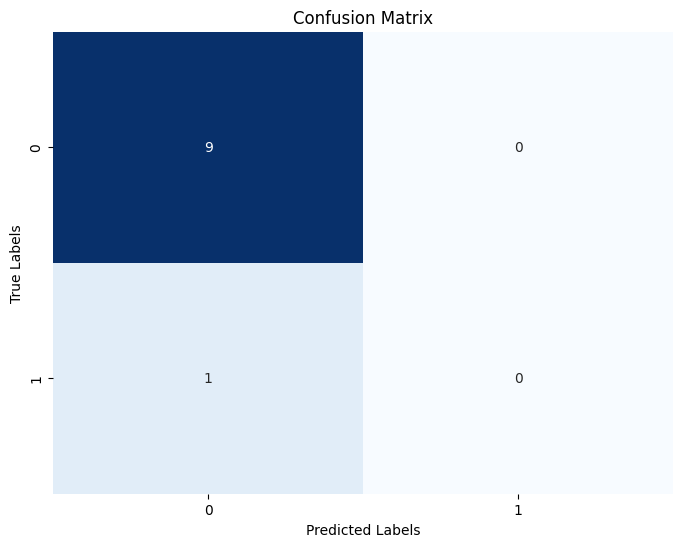

In [39]:
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
